In [10]:
import implementations_sk
import numpy as np
import pickle
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [12]:
from importlib import reload
reload(implementations_sk)
from implementations_sk import *

**Questions to Answer**

**1.** Which are the most cited patents (by other US patents), within the field of AI?

**2.** How much AI related patents granted through years and what its the percentage? 

**3.** We know that from common knowledge AI related researches increased and decreased agin in past decades, can we observe this situation by analysing the number of patents through years (in 1900s)? We also know that AI is one of the most popular area of research nowadays, will these popularity will also fade away like it has on the past or this time the characteristic of the popularity trend is different? 

**4.** Which countries have the most patents related to artificial intelligence? 

**5.** Who are the most prolific inventors?

**6.** Which companies are holding most AI patents? Is there a relationship between number of AI patents hold and the rank (according to Forbes top 500) of a company (meaning that smartest companies are also the the biggest ones)? 

**7.** Considering that Putin recently said “the nation that leads in AI will be the ruler of the world”. What is the relationship between number AI related patents and the rank of countries’ defense industry?

First, we gathered all the patents related to AI.

Keywords related to Artificla Intelligence has been gathered from different sources into "ai_keywords.txt".

In [13]:
keywords = set()

f = open("data/ai_keywords.txt")
for line in f.readlines():
    keywords.add(line.strip('\n'))

Initialize two dictionaries, one for counting the total number of patent granted and one for keeping track of AI related patents.

In [14]:
num_patents_by_year = dict()
ai_patents_by_year = dict()
for i in range(2018-1976):
    num_patents_by_year[str(1976+i)] = int()
    ai_patents_by_year[str(1976+i)] = pd.DataFrame()
    
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12",]

We iterate through years and months to get total number of patents.

In [15]:
pickle_in = open("data/num_patents_by_year.pickle","rb")
num_patents_by_year = pickle.load(pickle_in)

IPC code "G06" corresponds to "Computing; Calculating; Counting". More information related to IPC can be found [here](http://www.wipo.int/classifications/ipc/en/).

In [16]:
ipc_list = [("G", "06", "-")]

We iterate through years and months to get total number of patents related to AI.

In [17]:
pickle_in = open("data/ai_patents_by_year.pickle","rb")
ai_patents_by_year = pickle.load(pickle_in)

It seem that for 2015, something went wrong and no patent has been granted under IPC category "G06". (We checked and the error were not caused by our code.) Note that error caused by the PatensView itself.

We wanted to start with a basic question.

**1.** Which are the most cited patents (by other US patents) within the field of AI?

To answer this questions, we first, gathered all the patents in a single DataFrame.

In [18]:
all_ai_patents = pd.DataFrame()
for year in ai_patents_by_year:
    all_ai_patents = pd.concat([all_ai_patents, ai_patents_by_year[year]], ignore_index=True)

We organized the DataFrame to be able to see country, organiaztion, inventors and date more clearly.

Since different inventors could carry the same name, we are going to use their unique IDs to differentiate them.

In [19]:
inventor_id_name = dict()
for row in all_ai_patents["inventors"]:
    inventor_id = row[0]["inventor_id"]
    inventor_name = str(row[0]["inventor_first_name"]) + " " + str(row[0]["inventor_last_name"])
    inventor_id_name[inventor_id] = inventor_name

In [20]:
all_ai_patents = all_ai_patents.rename(columns={'patent_num_cited_by_us_patents': 'cited_by_count',}) 

all_ai_patents["country"] = all_ai_patents["assignees"].apply(lambda row: row[0]["assignee_country"])
all_ai_patents["organization"] = all_ai_patents["assignees"].apply(lambda row: row[0]["assignee_organization"])
all_ai_patents["inventor_id"] = all_ai_patents["inventors"].apply(lambda row: row[0]["inventor_id"])
all_ai_patents["inventor_name"] = all_ai_patents["inventor_id"].apply(lambda row: inventor_id_name[row])
all_ai_patents["year"] = all_ai_patents["patent_date"].apply(lambda row: int(row.split("-")[0]))
all_ai_patents["month"] = all_ai_patents["patent_date"].apply(lambda row: int(row.split("-")[1]))

all_ai_patents["cited_by_count"] = all_ai_patents["cited_by_count"].astype("int64")

all_ai_patents.index = all_ai_patents.patent_number
all_ai_patents = all_ai_patents.drop(columns=['assignees', 'inventors', 'patent_date', 'patent_number'])

In [21]:
all_ai_patents.head(5)

,patent_title,cited_by_count,country,organization,inventor_id,inventor_name,year,month
patent_number,,,,,,,,
3935562,Pattern recognition method and apparatus,14,None,None,3932839-1,Richard G. Stephens,1976,1
3936800,Pattern recognition system,95,None,None,3936800-1,Masakazu Ejiri,1976,2
3938089,Double read system for character recognition s...,15,US,Burroughs Corporation,3938089-1,Arvin D. McGregor,1976,2
3942153,Document transport and scanning system for opt...,3,US,Recognition Equipment Incorporated,3942153-1,Jack E. Balko,1976,3
3942169,Pattern recognition system,10,None,None,3942169-1,Yoshiji Fujimoto,1976,3


In our initial analysis we observe that, the patent dataset has a field for number of times that a particular patent cited by other patents however, further anaylsis showed that this field based only on US patentes. More clearly, here is the description of this field: "Number of times the patent was cited by other US patents". Consequently, we don't have information about citations from other countries and therefore, decided to restrict the question into citation made only by US patents.

Note that actual patents are not only from US, just the number of citation that a particular patent have is calculated only by citation of other US patents.

In [22]:
top_patents = all_ai_patents.sort_values(by='cited_by_count', ascending=False)
top_patents = top_patents[["patent_title","cited_by_count", "year", "organization",\
                           "inventor_name", "country"]]


with pd.option_context('display.max_colwidth', -1):
    display(top_patents.head(20))

,patent_title,cited_by_count,year,organization,inventor_name,country
patent_number,,,,,,
5875108,Ergonomic man-machine interface incorporating adaptive pattern recognition based control system,849,1999,None,Steven M. Hoffberg,None
5867799,Information system and method for filtering a massive flow of information entities to meet user information classification needs,736,1999,None,Andrew K. Lang,None
5933822,Apparatus and methods for an information retrieval system that employs natural language processing of search results to improve overall precision,599,1999,Microsoft Corporation,Lisa C. Braden-Harder,US
6055573,Communicating with a computer based on an updated purchase behavior classification of a particular consumer,598,2000,"SuperMarkets Online, Inc.",Will H. Gardenswartz,US
5974396,Method and system for gathering and analyzing consumer purchasing information based on product and consumer clustering relationships,597,1999,"Moore Business Forms, Inc.",Michael W. Anderson,US
6157955,Packet processing system including a policy engine having a classification unit,542,2000,Intel Corporation,Pradip Shankar,US
6363160,Interface using pattern recognition and tracking,456,2002,Intel Corporation,Boon-Lock Yeo,US
4843562,Broadcast information classification system and method,442,1989,Broadcast Data Systems Limited Partnership,Stephen C. Kenyon,US
6330546,Risk determination and management using predictive modeling and transaction profiles for individual transacting entities,430,2001,"HNC Software, Inc.",Allen P. Jost,US


Looking at the names of top cited patents, they potentially, have a lots of area of use. Take for example, *"Predictive modeling of consumer financial behavior"* patent, this technology is clearly, highly beneficial for any kind of company that interests in financial behaviour of its consumers (which is pretty much any company). Therefore, the use and popularity of this patent is quite expected as many other top-cited patens.

It is expected that most cited patents should be granted much earlier and this is the case for most of the top-cited patents including top 3 (all granted in 1999) however we also observe that there are some patents that are relatively new (e.g. 2002, 2011). This might be an indication of that innovations in this area still continues and there are many researches and technologies that are based on these patents.

Apart from citations by US patents, we don't have information about number of citations that a patent get by other patents. This means that we don't have a global picture of patent citations and for this reason, we decided restrict this part of our study to only analyzing top cited patents (as we did above) and not further. Since our study is not country specific and analyzing top cited data we have (top cited patents by other US patents) would only be related to US, we though that it is not completely aligns with the purpose our study. 

Now, we move onto deeper analysis of AI related patents.

**2.** How much AI related patents granted through years? 

**3.** We know that from common knowledge AI related researches increased and decreased again in past decades, can we observe this situation by analysing the number of patents through years (in 1900s)? We also know that AI is one of the most popular area of research nowadays, will these popularity will also fade away like it has on the past or this time the characteristic of the popularity trend is different? 

First, we calculated the number of overall and AI patents granted on each year.

In [23]:
ai_num_patents_by_year_df = pd.DataFrame(columns=['year','number_of_ai_patents'])
num_patents_by_year_df = pd.DataFrame(columns=['year','number_of_patents'])
for year in ai_patents_by_year:
    ai_num_patents_by_year_df = ai_num_patents_by_year_df\
        .append({'year': year,'number_of_ai_patents': len(ai_patents_by_year[year])}, ignore_index=True)
    num_patents_by_year_df = num_patents_by_year_df\
        .append({'year': year,'number_of_patents': num_patents_by_year[year]}, ignore_index=True)

Since there were something wrong with the year 2005, we were not able to use data belongs to that year and, data for the year 2017 still is not complete. We decided to drop these two years from dataset in order to maintain the continuity of line graphs. We though that dropping them is right course of action both for representation and analysis of the data.

In [24]:
ai_num_patents_by_year_df = ai_num_patents_by_year_df[~ai_num_patents_by_year_df.year.isin(["2005","2017"])]
num_patents_by_year_df = num_patents_by_year_df[~num_patents_by_year_df.year.isin(["2005","2017"])]

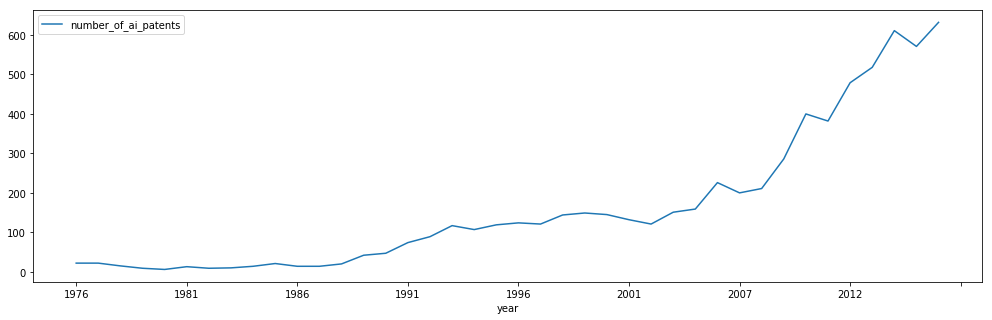

In [25]:
ai_num_patents_by_year_df.plot(x="year", y="number_of_ai_patents", figsize=(17,5),)

From this figure, it seems that there are two periods of time when number of AI patent rised which are 1986-1996 and 2006-2016. Other than these, the amount of patent seems pretty steady.  But since overall number of patents also rising over years, to be able to see the whole picture and make a more complete analysis, we also need to check the percentage of AI patents over all patents through years. 

In [26]:
merged_num_patent = pd.merge(ai_num_patents_by_year_df, num_patents_by_year_df, on="year")

merged_num_patent['ai_precentage'] =\
    merged_num_patent['number_of_ai_patents'] / merged_num_patent['number_of_patents'] * 100

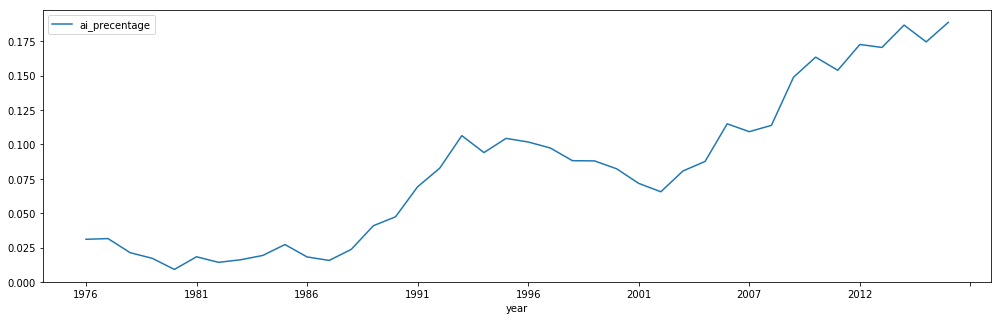

In [27]:
merged_num_patent.plot(x="year", y="ai_precentage", figsize=(17,5),)

There are couple of observations worth mentioning about these figures. **First** of all,  the graph starts with a decline from 1976. We already know that AI was popular field of research at 1960s (e.g. Artificial Neural Networks invented in this period.) and started to decline after that (mostly because of the lack of processing power and data). Although, we don't have data of 1960s, we can see that the graph starts with a steady line in 1976 then, rapid decline starting from 1977. It continues to decline for 3 years until it has the lowest value in 1980. The rate in 1977 is only reached again in 1989 which is 12 years lates.  So,we can derive that the line-graph's confirms our knowledge about the popularity of AI researches in 1960s. At this point, we though that it is also safe to think that percentage of AI patents is an indication the popularity of AI researches among others. **Another** interesting point is that percentage of AI patents rapidly rised from 1987 until 1994 then, stayed steady about 3 years and started to decline again. It continue to decline for 5 years, until 2002. Again, the rate of AI patents in 1997 is only reached after 10 years, around 2007. We can see that this trend is pretty similar to 1960s', it starts with a rapid increase, followed by a steady period then, a decrease for couple of years and in both situation, 13 years had to past before the rate come back to where it was. With the help of these trends, we can try to analyze the ***current situation***. We see that there is a dramatic increase on patent rates from 2002 to 2012 then, it stayed about the same rate with fluctuations. The characteristic that increasing rapidly and entering into steady phase is pretty similar to what we observed in last decades however it seems that the steady phase won't followed by a decline since the rates started to increase again in 2016. Although this might be an indication that popularity of AI related researches won't decline this time, like it did before, we still think that it is too early to infer that. The first two phases were similar to what has been observed in the past trends and it requires time (at least couple more years) to decide whether this time will be different or not.

It is clear that the AI researches are dramatically increased over 40 years, it was around 30 per/year with 0.03 percentage overall patents and It is around 700 per/year with a percentage of 0.12 now.

Further analysis related to characterictics of these trends (e.g. which types of companies involved, who are the invertors, which countries lead these trends etc.) will be examined later in this study.

**4.** Which countries have the most patents related to artificial intelligence? 

We create a dictionary to keep track of how mucn AI patents each country has through years.

In [28]:
ai_patent_by_country = dict()
for country in all_ai_patents.country.unique():
    ai_patent_by_country[country] = dict()
    for i in range(2018-1976):
        ai_patent_by_country[country][1976+i] = int()

for country, year in zip(all_ai_patents["country"], all_ai_patents["year"]):
    ai_patent_by_country[country][year] += 1

del ai_patent_by_country[None]
del ai_patent_by_country["City of\""]

We created a Dataframe with a row for each country and a column for each year.

In [29]:
country_year_df =\
pd.DataFrame([(country,year,value) for country,v in ai_patent_by_country.items() for year,value in v.items()],\
             columns = ['country','year','patent_num'])
country_year_df = country_year_df.pivot(index='country', columns='year', values='patent_num')

In [30]:
country_year_df.head(5)

year,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,,,,,,,,,,,
AE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
AU,0,0,0,0,0,0,0,0,0,0,...,0,0,1,3,1,4,2,1,2,0
BB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
BE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,1,1,0


We though that stacked bar chart would be a good indication of both to see which countries hold the most AI patents and observe change in number of AI patent through years.

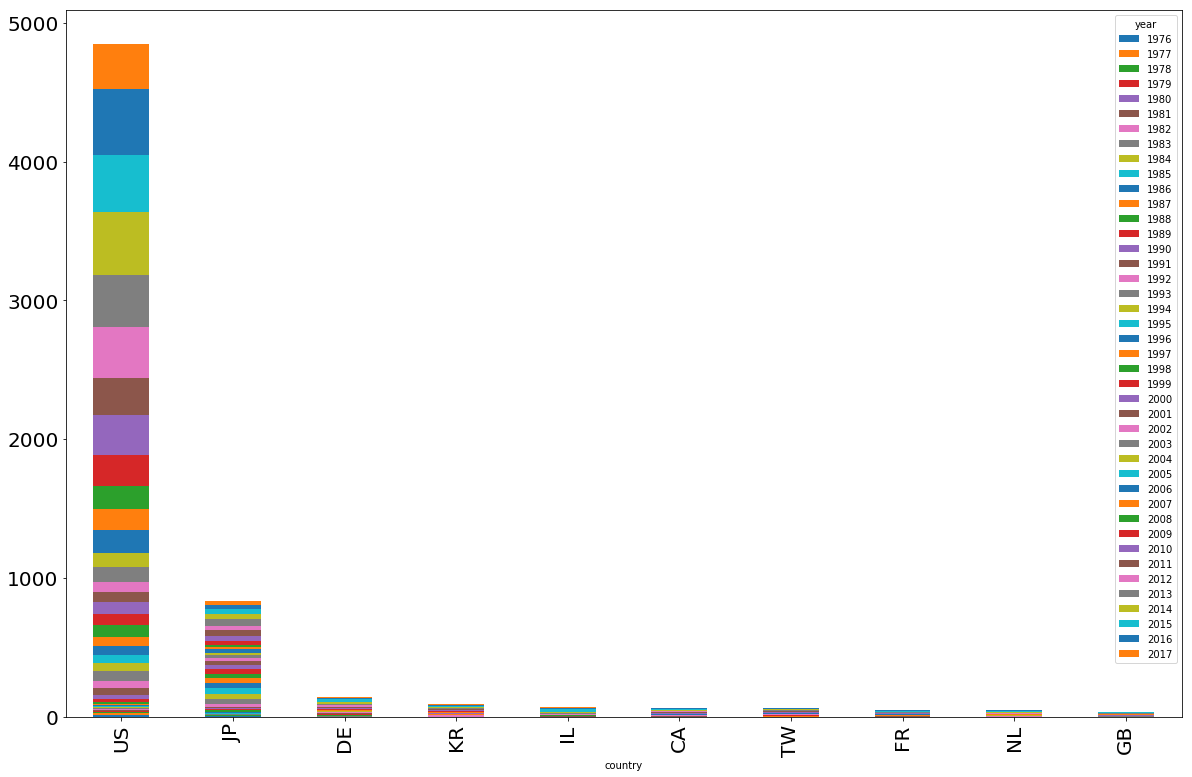

In [31]:
country_year_df_copy = country_year_df.copy()
country_year_df_copy['total'] = country_year_df_copy.apply(sum, axis=1)
clean_df = country_year_df_copy.sort_values(by='total', ascending=False).drop('total',axis=1).head(10)
clean_df.plot.bar(stacked=True, fontsize=20, figsize=(20,13));

**[Interpretation of the Figure]**

To further study, we wanted to analyze the evolution of AI related patents by an interactive visualization.

In [32]:
years = list()
for i in range(2018-1976):
    years.append(1976+i)

In [33]:
def draw_until_year(until_year):
    columns_drop = list()
    for year in years:
        if year > until_year:
            columns_drop.append(year)
    country_year_df_copy = country_year_df.copy()
    country_year_df_copy = country_year_df_copy.drop(columns=columns_drop)
    country_year_df_copy['total'] = country_year_df_copy.apply(sum, axis=1)
    clean_df = country_year_df_copy.sort_values(by='total', ascending=False).drop('total',axis=1).head(10)
    clean_df.plot.bar(stacked=True, fontsize=20, figsize=(20,13));

In [34]:
widgets.interact(draw_until_year, until_year=years)

interactive(children=(Dropdown(description='until_year', options=(1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017), value=1976), Output()), _dom_classes=('widget-interact',))

<function __main__.draw_until_year>

If interactive visualization doesn't displayed properly check [here](https://stackoverflow.com/a/38001920).

**[Interpretation of the Figure through Years]** - e.g. Isreal

**5.** Who are the most prolific inventors?

In [35]:
all_ai_patents.head(5)

,patent_title,cited_by_count,country,organization,inventor_id,inventor_name,year,month
patent_number,,,,,,,,
3935562,Pattern recognition method and apparatus,14,None,None,3932839-1,Richard G. Stephens,1976,1
3936800,Pattern recognition system,95,None,None,3936800-1,Masakazu Ejiri,1976,2
3938089,Double read system for character recognition s...,15,US,Burroughs Corporation,3938089-1,Arvin D. McGregor,1976,2
3942153,Document transport and scanning system for opt...,3,US,Recognition Equipment Incorporated,3942153-1,Jack E. Balko,1976,3
3942169,Pattern recognition system,10,None,None,3942169-1,Yoshiji Fujimoto,1976,3


### Number of granted patents over the past 10 years

This section aims to display the evolution of granted patent from January 2007 to January 2017

The API cannot return more than 100000 patents in one request. Thus, we need to collect the number of patents by months first and then aggregate the results to obtain the number of patents over a year.

Let's display the number of granted patents in a table. We use **get_nb_patents_year** to get the number of granted patent for a given year (12 months).

In [ ]:
years = list(range(2007,2017))
list_nb_patent=[get_nb_patents_year(str(year)) for year in years]
df_nb_patent=pd.DataFrame(index=years)
df_nb_patent['nb_patents']=list_nb_patent
df_nb_patent

We can plot the numbers to have a better visualization of the number of granted patent.

In [ ]:
plot(years, df_nb_patent['nb_patents']/1000, 'r', marker= '.')
plt.ylabel('Granted patents in thousands')
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
plt.title("Evolution of number of granted patents over the last decade")
plt.show()

### Number of granted patent delivered by countries

This section aims to display which countries are the top patent providers. In a given patent, multiple inventors might be cited. Those inventors can be located in different countries. In that case, +1 will be counted for a country if at least one of the inventor is in the given country. The number of patents between January 2016 and January 2017 was chosen for this study.

First, we read the excel file **location.xlsx** given by the USPTO website which contains all the countries which have delivered patents in the past. The country names are coded according to the Alpha-2 ISO norm ("US","GE","FR","CH",...)

In [ ]:
dfLocation=pd.read_excel(os.getcwd()+'/data/location.xlsx').fillna('')

We clean the countries list and keep the Alpha-2 ISO codes only 

In [ ]:
countries=list(set(list(dfLocation['country'])))
countries = [countries[i] for i in range(len(countries)) if (len(countries[i]) == 2 and countries[i]!='a"')]

The **get_nb_patent_country** function below returns the number of granted patents for a given country. It might be possible that some countries issue a large number of patents that exceeds 100'000 in the year which overwhelms the API capacity. In that case the API request is splited between the 6 first and 6 last months of the year, and the number of patents are summed up together. 

In [ ]:
dfNbPatents=pd.DataFrame(columns=['country','nb_patents'])
dfNbPatents['country']=countries
dfNbPatents['nb_patents']=list(map(lambda x: get_nb_patent_country(x),dfNbPatents['country']))

We just created the dataframe containing the patents data grouped by countries.

The number of patents are sorted by country and the barplot is displayed. We chose to plot the 15 top countries

In [ ]:
dfNbPatents.sort_values(by='nb_patents',inplace=True, ascending=False)
dfNbPatents.head(15).plot.bar(x='country', y='nb_patents', figsize=(17,5), grid=True)

Display the exact number for the 10 top patent delivered countries

In [ ]:
dfNbPatents.set_index(pd.Series(list(range(1,len(dfNbPatents) + 1))), inplace=True)
dfNbPatents.head(10)

### Choropleth map map of the granted patent distribution around the world


This section aims to display a vizual world map that highlights the granted patent dispersion across the countries. 

As there is a very large gap between the number of patents throughout the different countries, we opted for a **logarithmic scale** for a better vizualisation. Without loss of generality, we shall still be able to vizualize accurate relative differences between numbers.   

In [ ]:
# max_n is the maximum number of patents holder, which is the US
max_n = dfNbPatents['nb_patents'].max()
#Here, we set up a Colormap using the logarithmic scale as shades of Blue colors that will be used to color the map
colormap = cm.linear.PuBu.scale(0, round(math.log(max_n))).to_step(100)

In [ ]:
patents = dfNbPatents.copy()
#Take the log of the number of granted patents to match the logarithmic scale
log_nb = list(map(lambda x: math.log(x) if (x > 0) else 0 , patents['nb_patents']))
#In the below DataFrame, each country has now its 'logarithmic color code'
patents['log_color_code'] = log_nb
patents.head()

In [ ]:
#We need also to convert the table into a dictionnary, in order to map a feature to its number of patents.
patents_dict = patents.set_index('country')['log_color_code']

#Here we map each country to a color according to the "logarithmic" number of patents
color_dict = {key: colormap(patents_dict[key]) for key in patents_dict.keys()}

The function **ret_color** below, applies colors to the countries that were previously stored in **color_dict**.
In case a country does not appear in the list of patents, we assign the white color by default.

The JSON file **custom.geo.json** contains informations about the world countries. It is used to draw a Choropleth below.

We can now draw a chloropleth map that shows the number of patents around the world.

In [ ]:
m = folium.Map(location= [46.484, 8.1336],tiles='cartodbpositron',zoom_start=2)  

#Load the world map
countries_geo_path = 'data/custom.geo.json'
geo_json_data = json.load(open(countries_geo_path))

#Apply the colors using our defined function ret_color, desribed above
folium.GeoJson(geo_json_data,
               style_function=lambda feature: {
              'fillColor': ret_color(feature, color_dict),
              'weight': .5,
              'fillOpacity': 0.8
               }).add_to(m)

#Setting up the scale 
colormap = cm.linear.PuBu.scale(0, 170000).to_step(50)
colormap.caption = 'Number of patents'
m.add_child(colormap)

m.save('world.html')

Here is an overview of the distribution of granted patents over the world 

**The interactive map can be accessed [here](https://skagankose.github.io/ada_fall_2017/world.html).**

![Image](data/world_patent.png)

### GRANTED VS PENDING

Upon our initial milestone 2 objective, we wanted to compare how many patents application are granted. After digging deeper in the DataBase we found out that we can only obtain the granted patents. Therefore it will not be possible to carry out this comparison.

### TOP COMPANIES


This section aims to display the top companies patent publishers in the world. The function **get_company** below returns a dictionnary containing the companies as keys and their related number of patent application. 

To have a recent and significant number of patents we chose to analyse the patent applications over a recent period, namely here from the 1st of january 2017 to the 1st of may 2017. 

In [ ]:
# DataFrame containing patent counts by companies
company_patent_df = pd.DataFrame(list(get_company(2017, 1, 2017, 5).items()))
# Cleaning NaNs
company_patent_df.dropna(inplace=True)
# Changing columns names
company_patent_df.columns = ['company', 'total_patent']
# Converting to integers
company_patent_df.total_patent = company_patent_df.total_patent.astype('int64', copy=False)
# Descending sort by number of granted patents
top_companies_df = company_patent_df.sort_values(by='total_patent', ascending=False)

Here is the list of the TOP15 world patent issuers companies, in terms of number of granted patents:

In [ ]:
top_companies_df.head(15)

In [ ]:
top_companies_df.head(25).plot.barh(x='company', y='total_patent', figsize=(17,17), fontsize=20).invert_yaxis()

As we can see **International Business Machines Corporation (IBM)** is the leader in terms of the number of granted patents by holding more than 120'000 patents, followed by Samsung Electronics (roughly 75'000) and Canon (75'000).

### Patents by countries and sectors

The Cooperative Patent Classification (CPC) is a patent classification system, which has been jointly developed by the European Patent Office (EPO) and the United States Patent and Trademark Office (USPTO).

Patent categories according to CPC are indicated in the following table. We've used these categories for our initial analysis. We assigned a code to every categories for a paractical purpose.

| **CODE** | **DESCRIPTION**   |
|------|------|
|   **A**  | **Human Necessities**|
|   **B**  | **Operations and Transport**|
|   **C**  | **Chemistry and Metallurgy**|
|   **D**  | **Textiles**|
|   **E**  | **Fixed Constructions**|
|   **F**  | **Mechanical Engineering**|
|   **G**  | **Physics**|
|   **H**  | **Electricity**|
|   **Y**  | **Emerging Cross-Sectional Technologies**|

First we obtain the Alpha-2 codes for each country by reading **countries.csv**, which is provided by the **USPTO website** and initialise a dictionnary. The latter countains every countries and the number of patents by categories

In [ ]:
# # The following DataFrame contains the Alpha-2 ISO names of the world countries 
country_abbrev = list(pd.read_csv('data/countries.csv')['alpha-2'])
country_total_patent_category = dict()
for abbrev in country_abbrev:
    country_total_patent_category[abbrev] = {"A":0,"B":0,"C":0,"D":0,"E":0,"F":0,"G":0,"H":0,"Y":0,}

The function **get_countries_by_sectors** send requests to get the number of patents delivered by company sorted by sector. We chose 2016 to illustrate our study.

In [ ]:
country_total_patent_category = get_countries_by_sectors()

Create a dataframe containing every countries with their number of patents by sectors

In [ ]:
patent_category_df = pd.DataFrame(country_total_patent_category).transpose()

The function defined below, **figure_by_sector**, plots the TOP10 leading countries for a given sector (as the category label ('A','B','C',...), in terms of granted patents. The tuple containing the index indicates the location of the plot.

Then, we plot the top 10 countries for each sectors

In [ ]:
#This function plot one country, it takes as parameter the category ('A','B','C',...),
#the label (Operations and Transport) and a tuple containing the index which indicate where is the
#plot located

#Label mapping
category_label = [('A', 'Human Necessities'),('B', 'Operations and Transport'),\
                  ('C', 'Chemistry and Metallurgys'),('D', 'Textiles'), ('E', 'Fixed Constructions'),\
                  ('F', 'Mechanical Engineering'),('G', 'Physics'),('H', 'Electricity'),\
                  ('Y', 'Emerging Cross-Sectional Technologies'),]
    
fix, axes = plt.subplots(5, 2, figsize=(20, 35))
for index, (category, label) in enumerate(category_label):
    fıgure_by_sector(category, label, (int(index/2), index%2), axes, patent_category_df)

An other way of visualizasing can be performed by plotting the number of patents by country and sector a a stacked bar chart.

In [ ]:
# Plot the TOP10 countries in terms of granted patents in a stacked bar chart
patent_category_df['total'] = patent_category_df.apply(sum, axis=1)
clean_df = patent_category_df.sort_values(by='total', ascending=False).drop('total',axis=1).head(10)
clean_df.plot.bar(stacked=True, fontsize=20, figsize=(20,10));

As we can see, the United States is the leader country in all sectors. Japan also has also a significant number of patents in terms of sectors G and H. Other countries as Germany (DE), South Korea (KR), Taiwan (TW), France (FR), Netherlands (NL), Switzerland (CH), China (CN) and United Kingdom (GB) comes next with less significant number of patents.

### Spider charts modeling the different patent sectors in different countries

This function sorts the DataFrame containing the categorized patents for each country, by the given column passed as a parameter.

In [ ]:
def sortby(col):
    return cat_patent.sort_values(by=col, ascending=False)

As an example, this DataFrame represents the TOP5 countries in europe in terms of sector A, which is Human Necessities.

In [ ]:
cat_patent = pd.DataFrame(country_total_patent_category).transpose()
sortby('A').head()

After some examining different countries around the world, we decided to choose 9 of them, which are quite different between one another in terms of granted patents distribution across the sectors. For this task, we considered the *United States, Japan, Germany, Canada, Switzerland, France, the Netherlands, Great Britain* and *Korea*.

We will now display a spider chart for each one of them. The function **spider_chart** takes care of this task. It shows the involvment level of a given country in all the 7 sectors in CPC (Cooperative Patent Classification) by modeling the relative number of granted patents for each sector, country-wise.

In [ ]:
model_countries = [('US', 'United States'),('JP', 'Japan'), ('DE','Germany'), ('CA','Canada'),\
                   ('CH', 'Switzerland'), ('FR','France'), ('NL','Netherlands'), \
                   ('GB','Great Britain'), ('KR', 'Korea'), ('CN', 'China')]
    
model = sortby('A').head(15)
model = model.apply(lambda x: x/sum(x), axis=1) # Normalizing the number of patents per sector to extract percentage rates(%)

for i in range(len(model_countries)):
    spider_chart(model, model_countries[i][0], title= model_countries[i][1])

We can see that Japan, Korea, China, Great Britain France and the United States hold most of their patents in the Electricity and the Physics sectors. Switzerland's patents are more concentrated on Chemistry, Humans Necessities and Physics. Germany, Switzerland and Great Britain hold significant number of patents in Transport. 

In overall, Germany, Switzerland and Great Britain are the most polyvalent countries in terms of granted patent classifications, as we can see that they have the most diversified patents across the different sectors.

### Evolution of granted patents for a given sector

This last part aims to study the evolution of granted patents per sector of interest. This section will be done mostly for milestone 3.

As a brief overview, the evolution of patents in solar energy was carried out. At the end, this evolution will be compared with the aggregated evolution of patents (in every sector). This study will be useful for comparisons between different technologies in energy. 

The keywords used are given in the *paper* **"Patent-based Technology report - Alternative Energy Technology"** made by the **"World Intellectual Property Organization"**, which gives a fairly accurate result for energy technologies. The keywords are used to search for a match in the patent titles.  

In [ ]:
Keywords_Solar_Power= ["solar cell", "solar-cell","photovoltaic", "solar photo", "PV sun", "light cell",
"panel module"] 

The function **get_patents_keywords** returns the number of patents in a given year according to a list of key words at a given year.

This function also returns a dataframe containing 25 samples maximum of every patent related to a keyword (for checking sake)

In [ ]:
list_patent_nb_solar=[]
years= range(2007,2017)
for i in years:
    [dfPatent, nb_patent]=get_patents_keywords(Keywords_Solar_Power,str(i))
    list_patent_nb_solar+=[nb_patent]

Plot the evolution of number of patent between year 2007 and 2017

In [ ]:
plt.plot(years,list_patent_nb_solar)
plt.ylabel('Number of patents')
plt.title('Evolution of patents related to solar technologies')
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

The evolution of granted patent in solar energy can be compared with the aggregated evolution of granted patent for the past 10 years. In order to achieve this pupose, we can compute the growth of patents per year according to the folowing formula :

\begin{equation*}
Growth  = \frac{nb\ patents\ year\ i+1\ -\ nb\ patents\ year\ i}{nb\ patent\ year\ i}
\end{equation*}




In [ ]:
growth_solar=[]
growth=[]
list_nb_patent=list(df_nb_patent['nb_patents'])
for i in range(len(years)-1):
    growth_solar+=[(list_patent_nb_solar[i+1]-list_patent_nb_solar[i])/list_patent_nb_solar[i]*100]
    growth+=[(list_nb_patent[i+1]-list_nb_patent[i])/list_nb_patent[i]*100]

We plot the growth rate of the solar technology patents, compared to the average growth of patents across all sectors.

In [ ]:
plt.plot(range(2008,2017),growth_solar,range(2008,2017),growth)
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
plt.title("Relative growth of patents")
plt.legend("solar energy patents","general patents")
plt.ylabel('Growth rate %')
plt.show()

**The blue graph represents the growth of the solar technology related patents, and in orange the growth of patents in general**

It can be observed that the patents granted in solar technology had a significant growth between 2008 and 2013 compared to the other technologies.